<a href="https://colab.research.google.com/github/SarahKhader/DBSCAN/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, X):
        self.labels = [0] * len(X)
        self.cluster_id = 0
        self.visited = set()

        for i in range(len(X)):
            if i in self.visited:
                continue
            self.visited.add(i)
            neighbors = self.region_query(X, i)

            if len(neighbors) < self.min_samples:
                self.labels[i] = -1  # Noise point
            else:
                self.expand_cluster(X, i, neighbors)
                self.cluster_id += 1

        return self.labels

    def region_query(self, X, idx):
        neighbors = []
        for i, point in enumerate(X):
            if self.distance(X[idx], point) < self.eps:
                neighbors.append(i)
        return neighbors

    def expand_cluster(self, X, idx, neighbors):
        self.labels[idx] = self.cluster_id
        for neighbor_idx in neighbors:
            if neighbor_idx not in self.visited:
                self.visited.add(neighbor_idx)
                neighbor_neighbors = self.region_query(X, neighbor_idx)
                if len(neighbor_neighbors) >= self.min_samples:
                    neighbors.extend(neighbor_neighbors)
            if self.labels[neighbor_idx] == 0:
                self.labels[neighbor_idx] = self.cluster_id

    def distance(self, a, b):
        return sum((x - y) ** 2 for x, y in zip(a, b)) ** 0.5


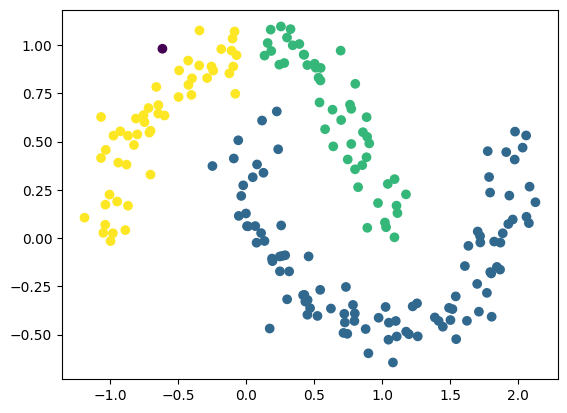

In [ ]:
# Example usage
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=200, noise=0.1)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()


This implementation creates a DBSCAN class with parameters eps (maximum distance between two samples for them to be considered as in the same neighborhood) and min_samples (minimum number of samples in a neighborhood for a point to be considered as a core point). It then has a fit method to fit the DBSCAN algorithm to the data. The region_query method finds all points within the eps distance of a given point. The expand_cluster method expands a cluster by recursively adding core points and their neighbors to the cluster. Finally, the distance method calculates the Euclidean distance between two points.

Compactness,Separation: Increase the distances between different clusters. To achieve this, it calculates: Intra-cluster variance: Measures the spread of data points within each cluster. Inter-cluster distance: Measures the distance between different clusters.

Noise points
,Silhouette Score: The silhouette score is a metric that combines the average within-cluster distance and the average nearest-cluster distance. Maximizing the silhouette score indicates well-separated clusters with similar intra-cluster distances.